In [1]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"

Albermarle_rainfall = pd.read_csv(os.path.join(path, 'Albermarle_rainfall.csv'))
Riding_Mill_water = pd.read_csv(os.path.join(path, 'Riding_Mill_water.csv'))

In [2]:
Albermarle_rainfall['dateTime'] = pd.to_datetime(Albermarle_rainfall['dateTime'])
Riding_Mill_water['dateTime'] = pd.to_datetime(Riding_Mill_water['dateTime'])

In [3]:
Riding_Mill_water.set_index('dateTime', inplace=True)
Albermarle_rainfall.set_index('dateTime', inplace=True)

In [4]:
start_date = pd.to_datetime('11/03/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('05/09/2023 00:00:00', format='%d/%m/%Y %H:%M:%S')
Riding_Mill_water_subset = Riding_Mill_water.loc[(Riding_Mill_water.index >= start_date) & (Riding_Mill_water.index <= end_date)]
Albermarle_rainfall_subset = Albermarle_rainfall.loc[(Albermarle_rainfall.index >= start_date) & (Albermarle_rainfall.index <= end_date)]

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
merged_data = pd.merge(Albermarle_rainfall_subset, Riding_Mill_water_subset, on='dateTime', how='inner')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [8]:
train_data = merged_data[:97767]
test_data = merged_data[97767:]

In [9]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [11]:
Ridge_RidingMill_96in_48out = Ridge()
cv_scores_RidingMill_96in_48out_Ridge = cross_val_score(Ridge_RidingMill_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [12]:
cv_scores_RidingMill_96in_48out_Ridge = -cv_scores_RidingMill_96in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_96in_48out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_96in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_96in_48out_Ridge.std())

Cross-validation scores:
[0.0033261  0.00181023 0.00212784 0.00177309 0.00204144]
Mean MSE: 0.002215741869174749
Standard Deviation MSE: 0.0005712053540840007


In [13]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [14]:
Ridge_RidingMill_48in_48out = Ridge()
cv_scores_RidingMill_48in_48out_Ridge = cross_val_score(Ridge_RidingMill_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_48in_48out_Ridge = -cv_scores_RidingMill_48in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_48in_48out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_48in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_48in_48out_Ridge.std())

Cross-validation scores:
[0.00336417 0.00182757 0.00216188 0.00182422 0.00215478]
Mean MSE: 0.0022665213212305457
Standard Deviation MSE: 0.0005686074555958065


In [15]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [16]:
Ridge_RidingMill_24in_48out = Ridge()
cv_scores_RidingMill_24in_48out_Ridge = cross_val_score(Ridge_RidingMill_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_24in_48out_Ridge = -cv_scores_RidingMill_24in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_24in_48out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_24in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_24in_48out_Ridge.std())

Cross-validation scores:
[0.0034693  0.00182498 0.00216739 0.00184413 0.00216327]
Mean MSE: 0.0022938141362592243
Standard Deviation MSE: 0.0006061021050013754


In [17]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [18]:
Ridge_RidingMill_96in_32out = Ridge()
cv_scores_RidingMill_96in_32out_Ridge = cross_val_score(Ridge_RidingMill_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_96in_32out_Ridge = -cv_scores_RidingMill_96in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_96in_32out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_96in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_96in_32out_Ridge.std())

Cross-validation scores:
[0.0018741  0.00113915 0.00134702 0.00114726 0.00138479]
Mean MSE: 0.0013784635798653705
Standard Deviation MSE: 0.00026735984359090053


In [19]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
Ridge_RidingMill_48in_32out = Ridge()
cv_scores_RidingMill_48in_32out_Ridge = cross_val_score(Ridge_RidingMill_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_48in_32out_Ridge = -cv_scores_RidingMill_48in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_48in_32out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_48in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_48in_32out_Ridge.std())

Cross-validation scores:
[0.00188252 0.00114546 0.00136065 0.00116076 0.00143124]
Mean MSE: 0.001396124999139758
Standard Deviation MSE: 0.0002673221516093887


In [21]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [22]:
Ridge_RidingMill_24in_32out = Ridge()
cv_scores_RidingMill_24in_32out_Ridge = cross_val_score(Ridge_RidingMill_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_24in_32out_Ridge = -cv_scores_RidingMill_24in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_24in_32out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_24in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_24in_32out_Ridge.std())

Cross-validation scores:
[0.00193963 0.00114306 0.00134387 0.00117105 0.0014432 ]
Mean MSE: 0.001408161215377982
Standard Deviation MSE: 0.0002878606227641414


In [23]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [24]:
Ridge_RidingMill_96in_16out = Ridge()
cv_scores_RidingMill_96in_16out_Ridge = cross_val_score(Ridge_RidingMill_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_96in_16out_Ridge = -cv_scores_RidingMill_96in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_96in_16out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_96in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_96in_16out_Ridge.std())

Cross-validation scores:
[0.00060913 0.00042814 0.00057456 0.00045867 0.00062964]
Mean MSE: 0.0005400300754893065
Standard Deviation MSE: 8.140597823286931e-05


In [25]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [26]:
Ridge_RidingMill_48in_16out = Ridge()
cv_scores_RidingMill_48in_16out_Ridge = cross_val_score(Ridge_RidingMill_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_48in_16out_Ridge = -cv_scores_RidingMill_48in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_48in_16out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_48in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_48in_16out_Ridge.std())

Cross-validation scores:
[0.00061045 0.00042708 0.00057065 0.000458   0.00063756]
Mean MSE: 0.000540747513739088
Standard Deviation MSE: 8.353838486525559e-05


In [27]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [28]:
Ridge_RidingMill_24in_16out = Ridge()
cv_scores_RidingMill_24in_16out_Ridge = cross_val_score(Ridge_RidingMill_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_24in_16out_Ridge = -cv_scores_RidingMill_24in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_24in_16out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_24in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_24in_16out_Ridge.std())

Cross-validation scores:
[0.00063007 0.00042897 0.00056984 0.0004551  0.0006446 ]
Mean MSE: 0.000545715323976333
Standard Deviation MSE: 8.867136812053967e-05


In [29]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [30]:
Ridge_RidingMill_96in_8out = Ridge()
cv_scores_RidingMill_96in_8out_Ridge = cross_val_score(Ridge_RidingMill_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_96in_8out_Ridge = -cv_scores_RidingMill_96in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_96in_8out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_96in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_96in_8out_Ridge.std())

Cross-validation scores:
[0.00017561 0.00014793 0.00019816 0.00013982 0.00024535]
Mean MSE: 0.00018137333631130202
Standard Deviation MSE: 3.808787659720268e-05


In [31]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [32]:
Ridge_RidingMill_48in_8out = Ridge()
cv_scores_RidingMill_48in_8out_Ridge = cross_val_score(Ridge_RidingMill_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_48in_8out_Ridge = -cv_scores_RidingMill_48in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_48in_8out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_48in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_48in_8out_Ridge.std())

Cross-validation scores:
[0.00017722 0.00014692 0.00019663 0.00013944 0.00024649]
Mean MSE: 0.00018134159523607854
Standard Deviation MSE: 3.856346169352909e-05


In [33]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [34]:
Ridge_RidingMill_24in_8out = Ridge()
cv_scores_RidingMill_24in_8out_Ridge = cross_val_score(Ridge_RidingMill_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_RidingMill_24in_8out_Ridge = -cv_scores_RidingMill_24in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_RidingMill_24in_8out_Ridge)
print("Mean MSE:", cv_scores_RidingMill_24in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_RidingMill_24in_8out_Ridge.std())

Cross-validation scores:
[0.00018243 0.00014764 0.00019728 0.00013745 0.00024807]
Mean MSE: 0.00018257652397026588
Standard Deviation MSE: 3.940234438931515e-05


In [ ]:
cv_scores_RidingMill_96in_48out_Ridge

In [35]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [36]:
Ridge_RidingMill_96in_48out = Ridge()
Ridge_RidingMill_96in_48out.fit(X_train, y_train)

Ridge()

In [37]:
pred_Ridge_RidingMill_96in_48out = Ridge_RidingMill_96in_48out.predict(X_test)

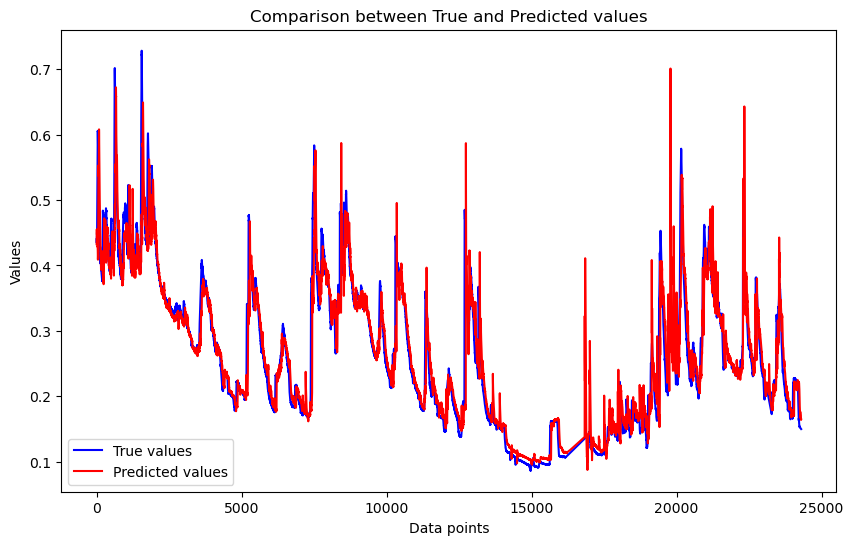

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_RidingMill_96in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [39]:
def nse(y_test, pred_Ridge_RidingMill_96in_48out):
    numerator = np.sum((y_test - pred_Ridge_RidingMill_96in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_RidingMill_96in_48out)
mae = mean_absolute_error(y_test, pred_Ridge_RidingMill_96in_48out)
nse_value = nse(y_test, pred_Ridge_RidingMill_96in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.001640272210042324
MAE: 0.02350283505625121
NSE: 0.8708102840321758


In [40]:
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_Ridge_RidingMill_96in_48out_1 = Ridge()

In [41]:
from sklearn.model_selection import GridSearchCV
grid_Ridge_RidingMill_96in_48out = GridSearchCV(grid_Ridge_RidingMill_96in_48out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_RidingMill_96in_48out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [42]:
best_ridge_params = grid_Ridge_RidingMill_96in_48out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.01}


In [43]:
tuned_Ridge_RidingMill_96in_48out = Ridge(alpha=0.01)

In [44]:
tuned_Ridge_RidingMill_96in_48out.fit(X_train, y_train)

Ridge(alpha=0.01)

In [45]:
pred_tuned_ridge_RidingMill_96in_48out = tuned_Ridge_RidingMill_96in_48out.predict(X_test)

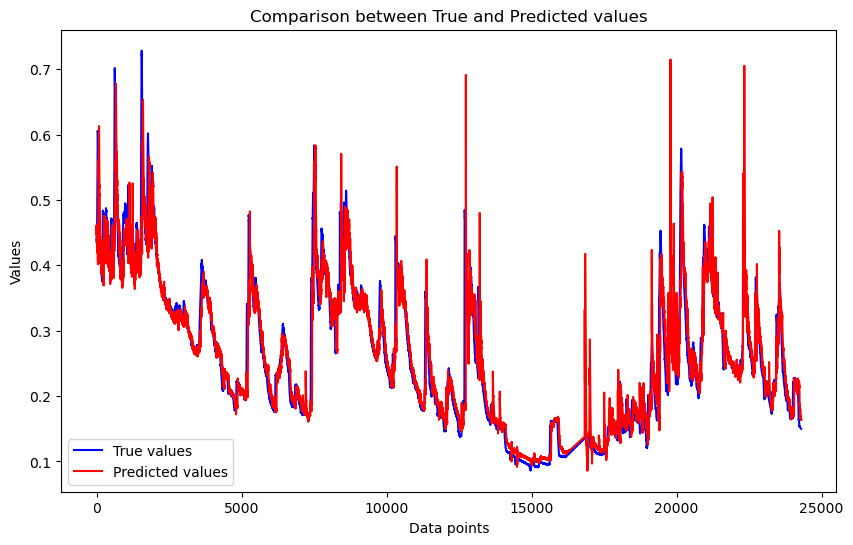

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_RidingMill_96in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [47]:
def nse(y_test, pred_tuned_ridge_RidingMill_96in_48out):
    numerator = np.sum((y_test - pred_tuned_ridge_RidingMill_96in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_RidingMill_96in_48out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_RidingMill_96in_48out)
nse_value = nse(y_test, pred_tuned_ridge_RidingMill_96in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0016252159555045936
MAE: 0.023305857686537722
NSE: 0.8719961318660657


In [ ]:
cv_scores_RidingMill_96in_32out_Ridge

In [50]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [51]:
Ridge_RidingMill_96in_32out = Ridge()
Ridge_RidingMill_96in_32out.fit(X_train, y_train)

Ridge()

In [52]:
pred_Ridge_RidingMill_96in_32out = Ridge_RidingMill_96in_32out.predict(X_test)

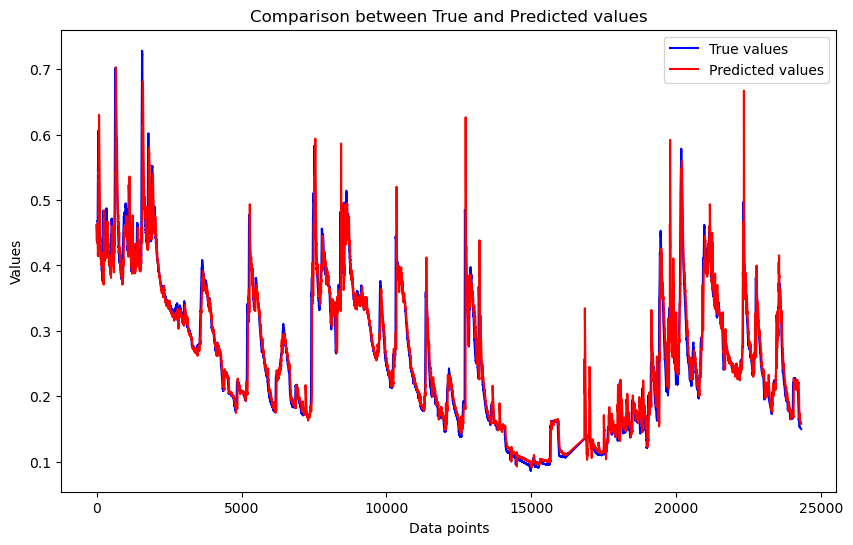

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_RidingMill_96in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [54]:
def nse(y_test, pred_Ridge_RidingMill_96in_32out):
    numerator = np.sum((y_test - pred_Ridge_RidingMill_96in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_RidingMill_96in_32out)
mae = mean_absolute_error(y_test, pred_Ridge_RidingMill_96in_32out)
nse_value = nse(y_test, pred_Ridge_RidingMill_96in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0010077295150076303
MAE: 0.017089126260477216
NSE: 0.920722855479699


In [55]:
grid_Ridge_RidingMill_96in_32out_1 = Ridge()
grid_Ridge_RidingMill_96in_32out = GridSearchCV(grid_Ridge_RidingMill_96in_32out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_RidingMill_96in_32out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [56]:
best_ridge_params = grid_Ridge_RidingMill_96in_32out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.01}


In [57]:
tuned_Ridge_RidingMill_96in_32out = Ridge(alpha=0.01)

In [58]:
tuned_Ridge_RidingMill_96in_32out.fit(X_train, y_train)

Ridge(alpha=0.01)

In [59]:
pred_tuned_Ridge_RidingMill_96in_32out = tuned_Ridge_RidingMill_96in_32out.predict(X_test)

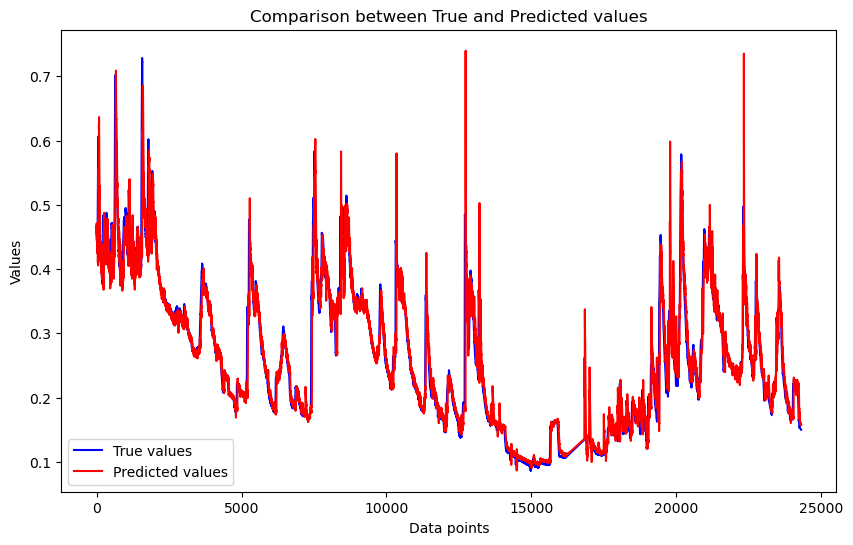

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_Ridge_RidingMill_96in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [61]:
def nse(y_test, pred_tuned_Ridge_RidingMill_96in_32out):
    numerator = np.sum((y_test - pred_tuned_Ridge_RidingMill_96in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_Ridge_RidingMill_96in_32out)
mae = mean_absolute_error(y_test, pred_tuned_Ridge_RidingMill_96in_32out)
nse_value = nse(y_test, pred_tuned_Ridge_RidingMill_96in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0009894215767558441
MAE: 0.016864068616811206
NSE: 0.9221631239694481


In [ ]:
cv_scores_RidingMill_96in_16out_Ridge

In [62]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [63]:
Ridge_RidingMill_96in_16out = Ridge()
Ridge_RidingMill_96in_16out.fit(X_train, y_train)

Ridge()

In [64]:
pred_Ridge_RidingMill_96in_16out = Ridge_RidingMill_96in_16out.predict(X_test)

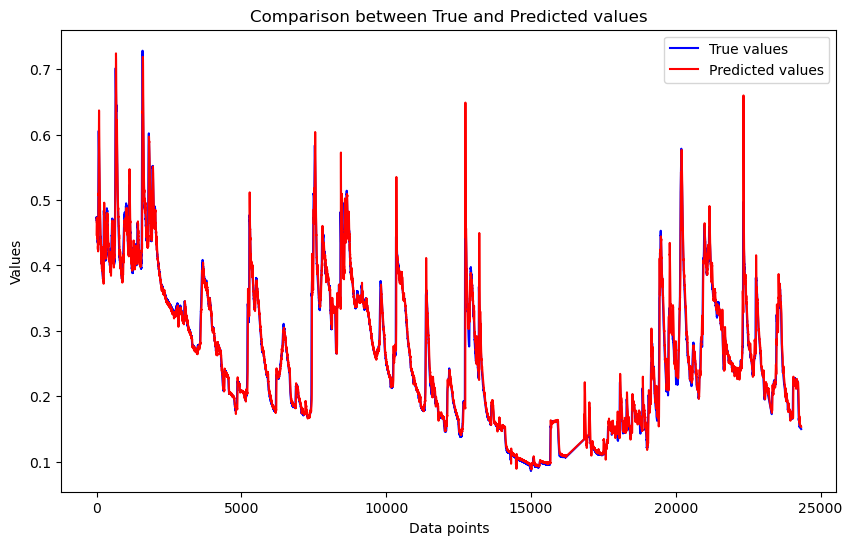

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_RidingMill_96in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [66]:
def nse(y_test, pred_Ridge_RidingMill_96in_16out):
    numerator = np.sum((y_test - pred_Ridge_RidingMill_96in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_RidingMill_96in_16out)
mae = mean_absolute_error(y_test, pred_Ridge_RidingMill_96in_16out)
nse_value = nse(y_test, pred_Ridge_RidingMill_96in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00039045636152734405
MAE: 0.009148156257632767
NSE: 0.9693306465647417


In [67]:
grid_Ridge_RidingMill_96in_16out_1 = Ridge()
grid_Ridge_RidingMill_96in_16out = GridSearchCV(grid_Ridge_RidingMill_96in_16out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_RidingMill_96in_16out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [68]:
best_ridge_params = grid_Ridge_RidingMill_96in_16out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.01}


In [73]:
tuned_Ridge_RidingMill_96in_16out = Ridge(alpha=0.01)
tuned_Ridge_RidingMill_96in_16out.fit(X_train, y_train)

Ridge(alpha=0.01)

In [74]:
pred_tuned_ridge_RidingMill_96in_16out = tuned_Ridge_RidingMill_96in_16out.predict(X_test)

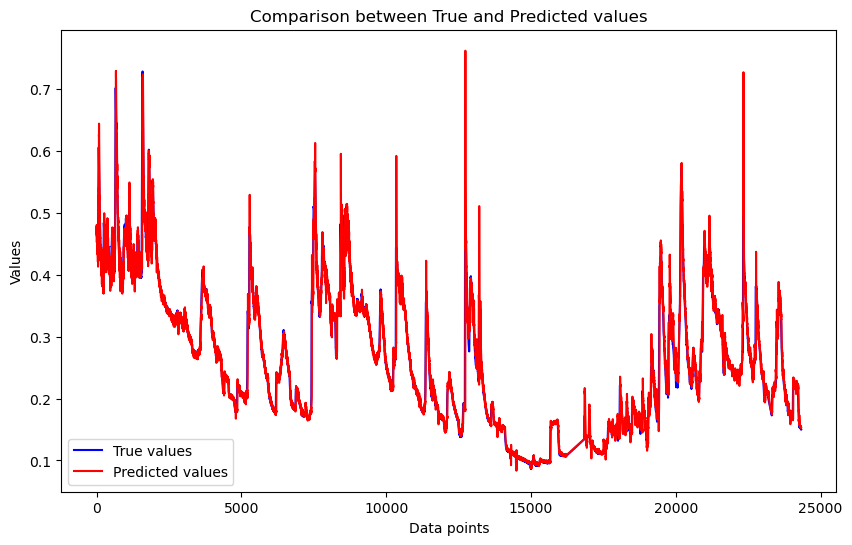

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_RidingMill_96in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [76]:
def nse(y_test, pred_tuned_ridge_RidingMill_96in_16out):
    numerator = np.sum((y_test - pred_tuned_ridge_RidingMill_96in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_RidingMill_96in_16out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_RidingMill_96in_16out)
nse_value = nse(y_test, pred_tuned_ridge_RidingMill_96in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0003750355492498403
MAE: 0.00896780687749684
NSE: 0.9705419121211473


In [ ]:
cv_scores_RidingMill_48in_8out_Ridge

In [77]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [78]:
Ridge_RidingMill_48in_8out = Ridge()
Ridge_RidingMill_48in_8out.fit(X_train, y_train)

Ridge()

In [79]:
pred_Ridge_RidingMill_48in_8out = Ridge_RidingMill_48in_8out.predict(X_test)

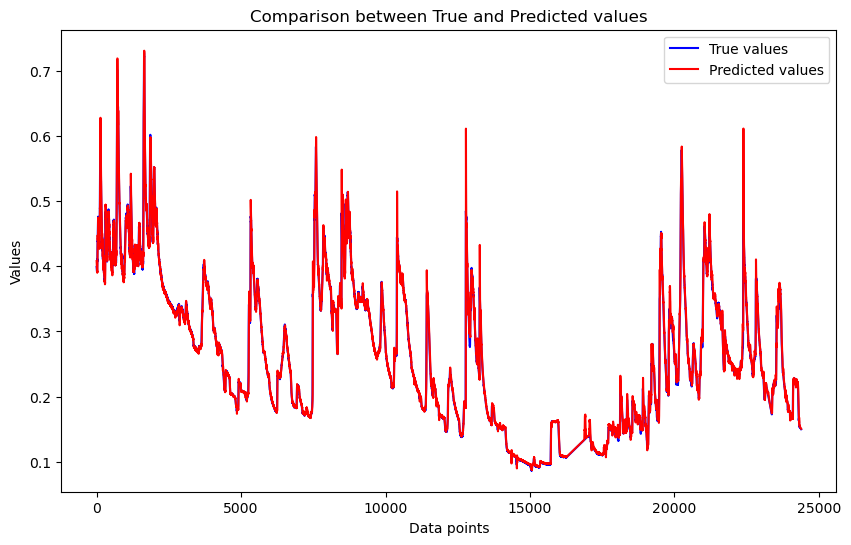

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_RidingMill_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [82]:
def nse(y_test, pred_Ridge_RidingMill_48in_8out):
    numerator = np.sum((y_test - pred_Ridge_RidingMill_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_RidingMill_48in_8out)
mae = mean_absolute_error(y_test, pred_Ridge_RidingMill_48in_8out)
nse_value = nse(y_test, pred_Ridge_RidingMill_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00013046554856004108
MAE: 0.004475130814182063
NSE: 0.9897797962891355


In [83]:
grid_Ridge_RidingMill_48in_8out_1 = Ridge()
grid_Ridge_RidingMill_48in_8out = GridSearchCV(grid_Ridge_RidingMill_48in_8out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_RidingMill_48in_8out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [84]:
best_ridge_params = grid_Ridge_RidingMill_48in_8out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.001}


In [85]:
tuned_Ridge_RidingMill_48in_8out = Ridge(alpha=0.001)
tuned_Ridge_RidingMill_48in_8out.fit(X_train, y_train)

Ridge(alpha=0.001)

In [86]:
pred_tuned_ridge_RidingMill_48in_8out = tuned_Ridge_RidingMill_48in_8out.predict(X_test)

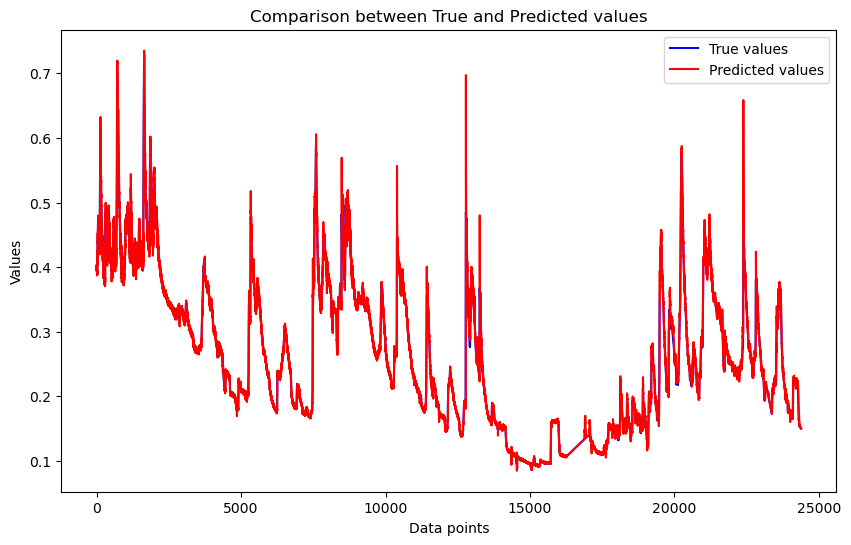

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_RidingMill_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [88]:
def nse(y_test, pred_tuned_ridge_RidingMill_48in_8out):
    numerator = np.sum((y_test - pred_tuned_ridge_RidingMill_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_RidingMill_48in_8out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_RidingMill_48in_8out)
nse_value = nse(y_test, pred_tuned_ridge_RidingMill_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0001191665873352435
MAE: 0.004451109016976952
NSE: 0.9906649164355122


In [89]:
from joblib import dump
dump(Ridge_RidingMill_48in_8out, 'Ridge_RidingMill_48in_8out.joblib')

['Ridge_RidingMill_48in_8out.joblib']

In [90]:
dump(grid_Ridge_RidingMill_96in_48out, 'grid_Ridge_RidingMill_96in_48out.joblib')

['grid_Ridge_RidingMill_96in_48out.joblib']

In [91]:
dump(Ridge_RidingMill_96in_48out, 'Ridge_RidingMill_96in_48out.joblib')

['Ridge_RidingMill_96in_48out.joblib']

In [92]:
dump(grid_Ridge_RidingMill_96in_32out, 'grid_Ridge_RidingMill_96in_32out.joblib')

['grid_Ridge_RidingMill_96in_32out.joblib']

In [93]:
dump(Ridge_RidingMill_96in_32out, 'Ridge_RidingMill_96in_32out.joblib')

['Ridge_RidingMill_96in_32out.joblib']

In [94]:
dump(grid_Ridge_RidingMill_96in_16out, 'grid_Ridge_RidingMill_96in_16out.joblib')

['grid_Ridge_RidingMill_96in_16out.joblib']

In [95]:
dump(Ridge_RidingMill_96in_16out, 'Ridge_RidingMill_96in_16out.joblib')

['Ridge_RidingMill_96in_16out.joblib']

In [96]:
dump(grid_Ridge_RidingMill_48in_8out, 'grid_Ridge_RidingMill_48in_8out.joblib')

['grid_Ridge_RidingMill_48in_8out.joblib']